#### 4Q2 Simple Linear Regression 
Build a simple linear regression model by performing EDA and do necessary transformations and select the best model.

2) Salary_hike -> Build a prediction model for Salary_hike

use salary_data.csv

In [19]:
!pip install pandas.profiling
!pip install sweetviz

In [20]:
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pp
import sweetviz as sv

In [2]:
#import dataset
data= pd.read_csv("Salary_Data.csv")
data.info() #There are no null values in this dataset. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [3]:
#correlation coefficeint
data.corr() # Very High correlation between Years of Experience and Salary

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

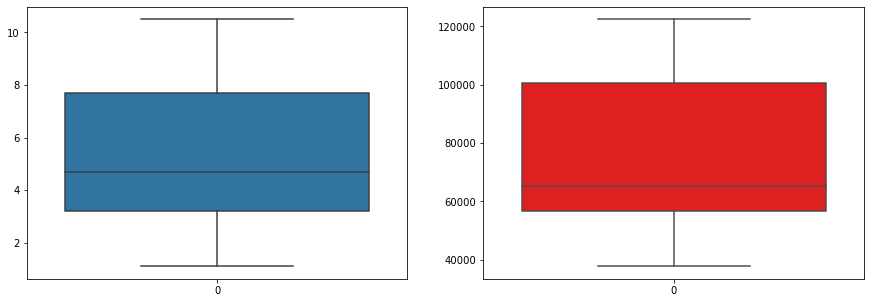

In [4]:

fig, axes =plt.subplots(1,2, figsize=(15,5))
sns.boxplot(data=data['YearsExperience'],ax=axes[0])
sns.boxplot(data=data['Salary'],color='red')
plt.show

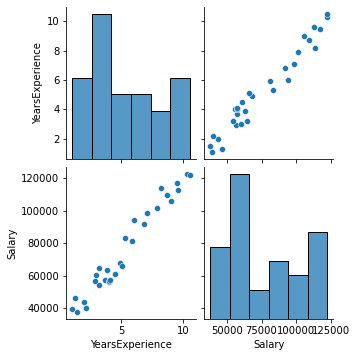

In [5]:
#pairplot
sns.pairplot(data) #There isa near perfect linear relation.

In [21]:
#eda_report= pp.ProfileReport(data)
#eda_report.to_file(output_file='report.html')
#sweet_report=sv.analyze(data)
#sweet_report.show_html("show_report.html")


Report show_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

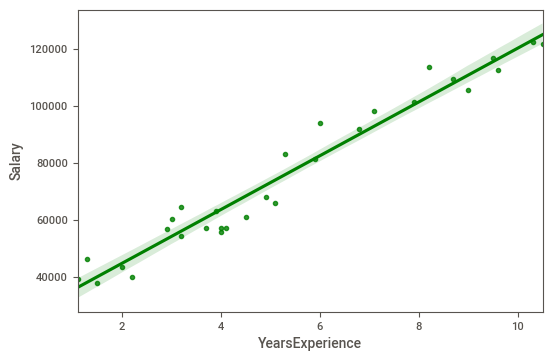

In [24]:
sns.regplot(x="YearsExperience", y="Salary", data=data, color='g') #Great Linear relationship is clearly visible

### Fitting a Linear Regression Model
using statsmodel library

In [25]:
model=smf.ols('Salary~YearsExperience', data).fit()

In [11]:
model.summary()
#R-Sqr value is very good.
#p-values reveal that delivery time and sorting time are very dependent. Default alternate hypothesis is accepted

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 24 Jun 2021   Prob (F-statistic):           1.14e-20
Time:                        18:30:02   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
#Coefficients
print(model.params)

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64


In [35]:
#t and p-Values
print(model.pvalues)
print(model.tvalues)

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64
Intercept          11.346940
YearsExperience    24.950094
dtype: float64


In [14]:
#R squared values
print(model.rsquared,model.rsquared_adj) #Very good values

0.9569566641435086 0.9554194021486339


In [40]:
pred=pd.Series([4,5,6.6,3.5,7.5])
predval=pd.DataFrame(pred,columns=['YearsExperience'])
model.predict(predval)

0    63592.049484
1    73042.011806
2    88161.951520
3    58867.068324
4    96666.917610
dtype: float64

## Result
The model has been created for predicting salary from the years of experience. The R-values are excellent for this model(about 95%). This model can predict salaries very accurately.